In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [2]:
df_train = pd.read_csv(r'C:\Users\SRIJA\Documents\DS\ml\Demo Datasets\Lesson 4\train.csv')
df_train.shape

(891, 12)

In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [10]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
df_train.groupby(['Pclass']).mean() 

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [16]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
df_train.dropna(inplace=True)

In [18]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
#convert categorical into numbers
df_train_dummied = pd.get_dummies(df_train,columns=['Sex'])
df_train_dummied = pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [20]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

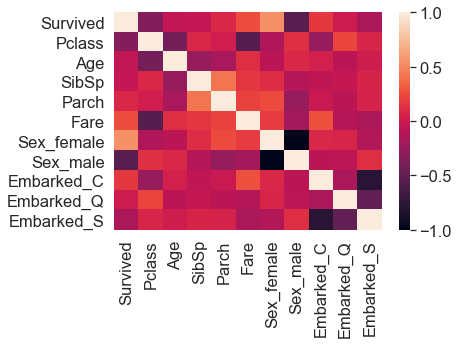

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [22]:
#lets build a classifier which can predict survival creating train and test data sets using X and Y variables

used_features = ["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [25]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)


LogisticRegression()

In [27]:
y_pred = LogReg.predict(X_test)

#compute the confusion matrix to evaluate the accuracy of classification
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [28]:
#to obtain accuracy
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [29]:
len(X_test)

267

In [30]:
#computing other performance measures from the confusion matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [31]:
LogReg.coef_

array([[-1.0416583 , -0.03986563, -0.2418657 , -0.0405489 ,  1.19684229,
        -1.191862  ,  0.35142572, -0.03561634, -0.3108291 ]])

In [32]:
LogReg.intercept_

array([3.6503613])

In [33]:
#we can further check our algorithms predicted probabilities using the X_test

df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [34]:
#the first col is the probability that the entry has not survived label and 2nd is the survived label

LogReg.predict_proba(X_test)

array([[0.26543762, 0.73456238],
       [0.39670167, 0.60329833],
       [0.94739252, 0.05260748],
       [0.25946287, 0.74053713],
       [0.94405682, 0.05594318],
       [0.13498849, 0.86501151],
       [0.33318424, 0.66681576],
       [0.51891172, 0.48108828],
       [0.78162823, 0.21837177],
       [0.40735921, 0.59264079],
       [0.74014692, 0.25985308],
       [0.21156393, 0.78843607],
       [0.74871108, 0.25128892],
       [0.14562753, 0.85437247],
       [0.86463688, 0.13536312],
       [0.36950158, 0.63049842],
       [0.89368398, 0.10631602],
       [0.29766694, 0.70233306],
       [0.17634635, 0.82365365],
       [0.39887297, 0.60112703],
       [0.90490942, 0.09509058],
       [0.55285824, 0.44714176],
       [0.86434636, 0.13565364],
       [0.93739461, 0.06260539],
       [0.51638224, 0.48361776],
       [0.51590185, 0.48409815],
       [0.03915836, 0.96084164],
       [0.8692353 , 0.1307647 ],
       [0.89806853, 0.10193147],
       [0.32523047, 0.67476953],
       [0.

In [35]:
LogReg.predict_proba(X_test).shape

(267, 2)